#Evaluation and Analysis

file contains these columns:

true_sentiment – from DeBERTa
predicted_sentiment – from BERTweet


Load Data

In [3]:
import pandas as pd

# Load prediction results
df = pd.read_csv("BERTweet_sentiment_predictions.csv")


In [5]:
print(df.columns)
df.head(3)


Index(['input_text', 'true_label', 'predicted_label', 'true_sentiment',
       'predicted_sentiment'],
      dtype='object')


,input_text,true_label,predicted_label,true_sentiment,predicted_sentiment
0,Islamic Identity [SEP] always remember malaysi...,0,0,negative,negative
1,Race [SEP] muslim league which led the movemen...,1,1,neutral,neutral
2,Race [SEP] similar to islam where saudis promo...,1,1,neutral,neutral


In [6]:
df.shape

(1066, 5)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels
le = LabelEncoder()
df['true_encoded'] = le.fit_transform(df['true_sentiment'])
df['pred_encoded'] = le.transform(df['predicted_sentiment'])

# Map
print("Label Encoding Map:", dict(zip(le.classes_, le.transform(le.classes_))))


Label Encoding Map: {'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}


In [11]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt


###STEP 1: Accuracy (Ketepatan)

In [12]:
accuracy = accuracy_score(df['true_encoded'], df['pred_encoded'])
print(f"Step 1 – Accuracy (Ketepatan): {accuracy:.4f}")


Step 1 – Accuracy (Ketepatan): 0.8443


###STEP 2: Kepersisan (Precision)

In [13]:
precision = precision_score(df['true_encoded'], df['pred_encoded'], average='weighted')
print(f"Step 2 – Precision (Kepersisan): {precision:.4f}")


Step 2 – Precision (Kepersisan): 0.8417


###STEP 3: Kepekaan (Recall)

In [14]:
recall = recall_score(df['true_encoded'], df['pred_encoded'], average='weighted')
print(f"Step 3 – Recall (Kepekaan): {recall:.4f}")


Step 3 – Recall (Kepekaan): 0.8443


###STEP 4: Skor-F1 (F1-Score)

In [15]:
f1 = f1_score(df['true_encoded'], df['pred_encoded'], average='weighted')
print(f"Step 4 – F1 Score (Skor-F1): {f1:.4f}")


Step 4 – F1 Score (Skor-F1): 0.8419


###STEP 5: Laporan Klasifikasi (Classification Report)

In [16]:
report = classification_report(
    df['true_encoded'],
    df['pred_encoded'],
    target_names=['negative', 'neutral', 'positive']
)
print("Step 5 – Laporan Klasifikasi:\n")
print(report)


Step 5 – Laporan Klasifikasi:

              precision    recall  f1-score   support

    negative       0.87      0.91      0.89       566
     neutral       0.83      0.82      0.83       400
    positive       0.74      0.59      0.66       100

    accuracy                           0.84      1066
   macro avg       0.81      0.77      0.79      1066
weighted avg       0.84      0.84      0.84      1066



###STEP 6: Matriks Kekeliruan (Confusion Matrix)

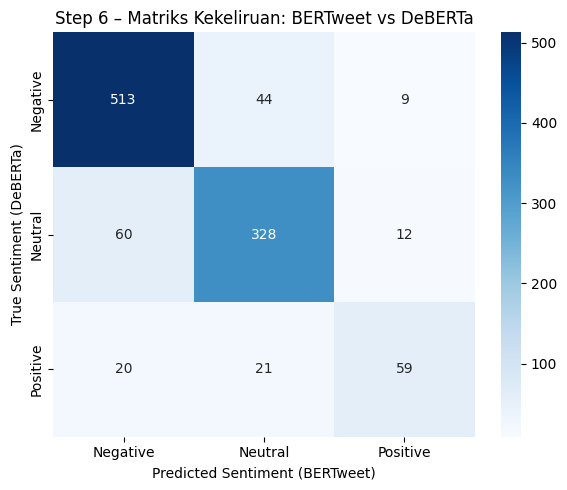

In [17]:
cm = confusion_matrix(df['true_encoded'], df['pred_encoded'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted Sentiment (BERTweet)")
plt.ylabel("True Sentiment (DeBERTa)")
plt.title("Step 6 – Matriks Kekeliruan: BERTweet vs DeBERTa")
plt.tight_layout()
plt.show()


#ANALYSIS DATASET and ASPECT


- Sentiment Distribution by Timeline
- Sentiment by Islamophobia Type
- Aspect-Sentiment Interaction

###1.Sentiment Distribution by Timeline (Timeline)



In [19]:
import pandas as pd

# Load prediction results
df = pd.read_csv("ABSA-DeBERTa_annotate.csv")

/tmp/ipython-input-25-563166381.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['created_at'].dt.to_period('M') # Keep it as Period


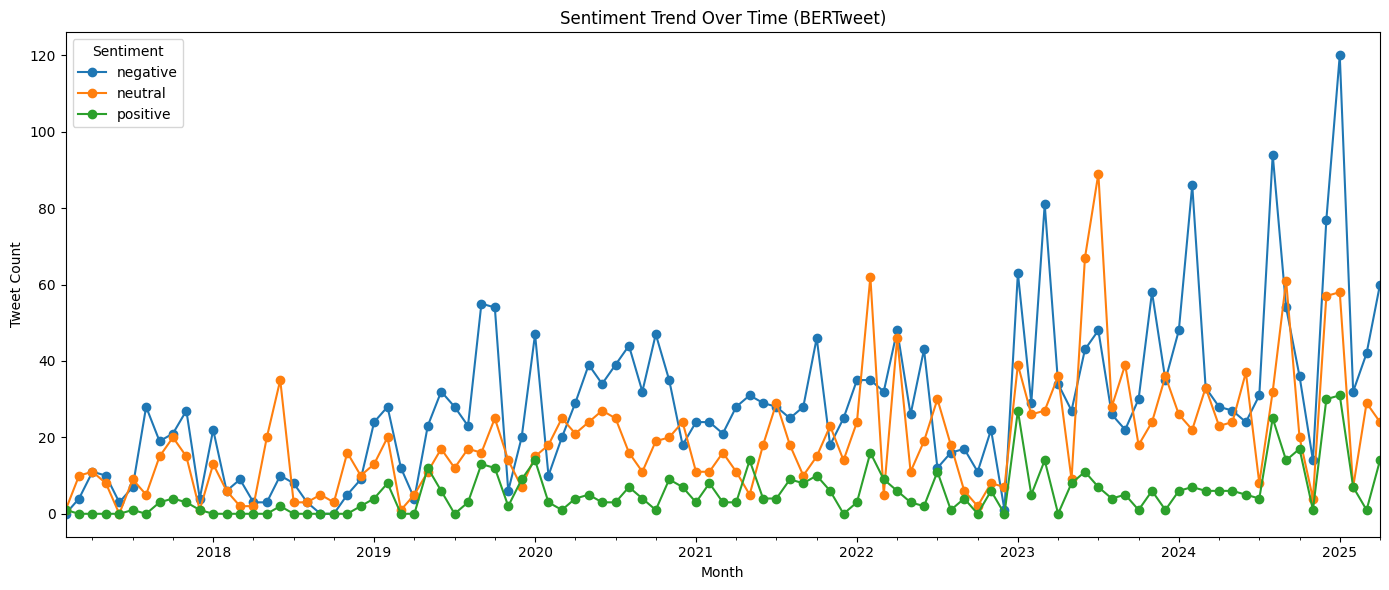

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Ensure pandas is imported if not already in this cell

# Load the merged sentiment analysis results (RoBERta, BERTweet, XLM-R) with metadata
# Assuming df is already loaded and 'created_at' is datetime
# If not, uncomment and run the necessary cells above this one

# Ensure created_at is datetime and month is a Period object
if not pd.api.types.is_datetime64_any_dtype(df['created_at']):
    df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Create 'month' column as Period objects
df['month'] = df['created_at'].dt.to_period('M') # Keep it as Period

# Use the same sentiment_trend (monthly)
# Grouping with Period objects works fine
sentiment_trend = df.groupby(['month', 'deberta_sentiment']).size().unstack(fill_value=0)

# Plot
# Using the plot method directly on the dataframe often handles the index type better
ax = sentiment_trend.plot(figsize=(14, 6), marker='o')

plt.title("Sentiment Trend Over Time (BERTweet)")
plt.xlabel("Month")
plt.ylabel("Tweet Count")

# Matplotlib should now handle the PeriodIndex correctly for tick placement and labels
# We can remove the manual set_xticks and set_xticklabels calls
# If needed, you can customize the date format using ax.xaxis.set_major_formatter

plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

###2. Sentiment by Islamophobia Type
Distribution of Types of Islamophobia Over Time

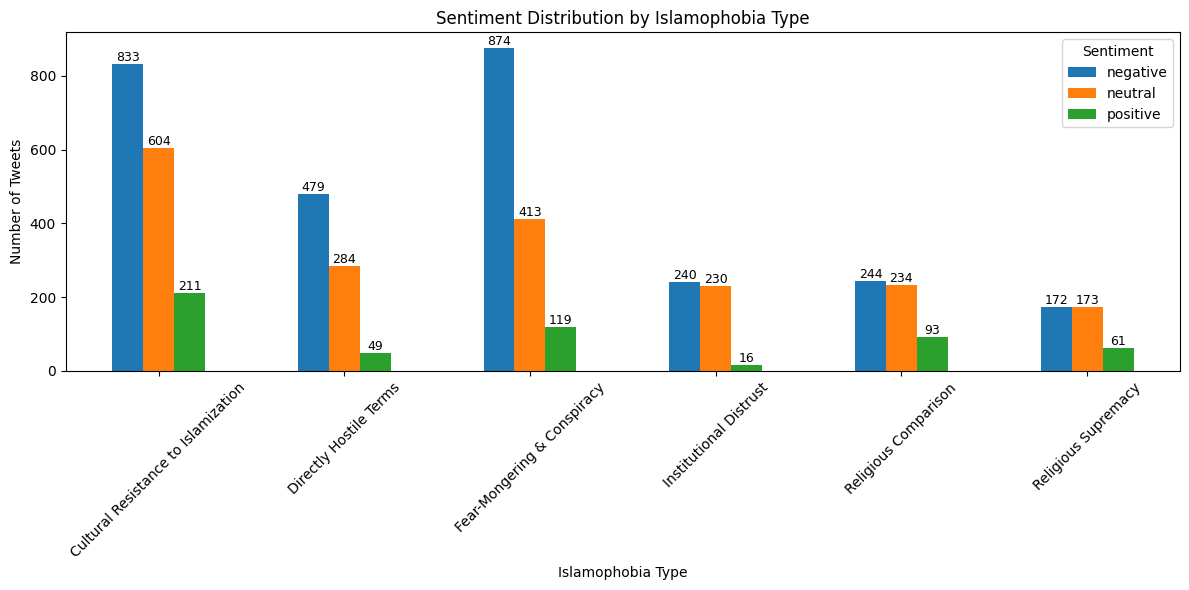

In [29]:
import matplotlib.pyplot as plt

# Group and prepare data
type_sentiment_bt = df.groupby(['type', 'deberta_sentiment']).size().unstack(fill_value=0)
type_sentiment_bt = type_sentiment_bt.sort_index()

# Plot grouped bar chart
ax = type_sentiment_bt.plot(kind='bar', figsize=(12, 6))

# Add value labels on each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(str(height),
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

# Chart formatting
plt.title("Sentiment Distribution by Islamophobia Type")
plt.xlabel("Islamophobia Type")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


Distribution of Aspects Over Time

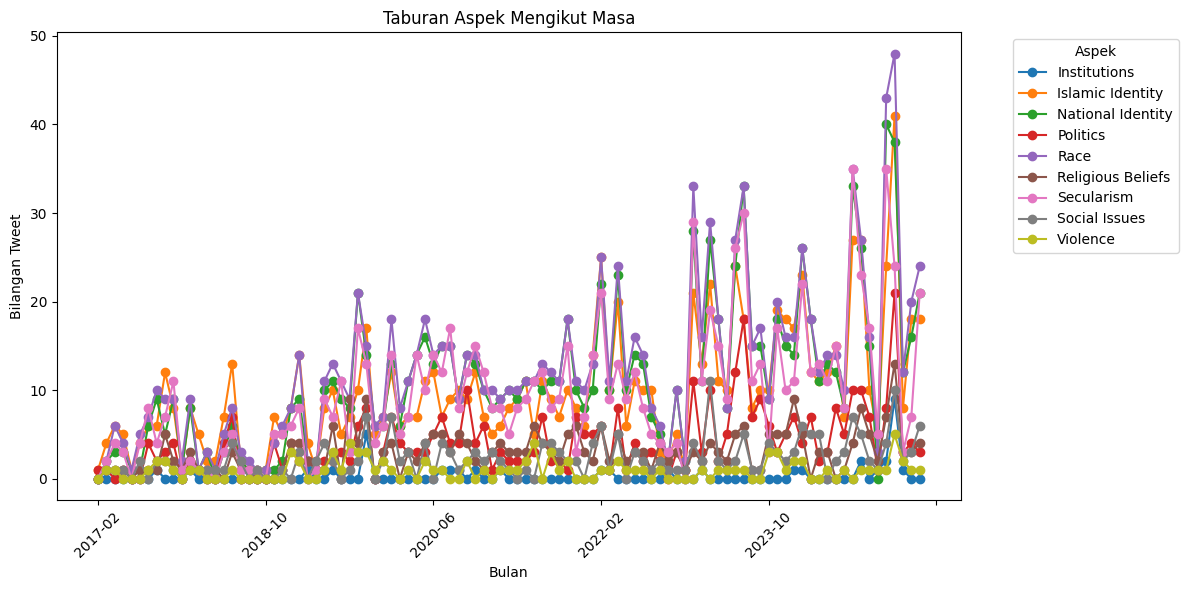

In [23]:
aspect_timeline = df.groupby(['month', 'aspect']).size().unstack(fill_value=0)

aspect_timeline.plot(figsize=(12, 6), marker='o')
plt.title("Taburan Aspek Mengikut Masa")
plt.xlabel("Bulan")
plt.ylabel("Bilangan Tweet")
plt.xticks(rotation=45)
plt.legend(title="Aspek", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


###3. Aspect-Sentiment Interaction per Type

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by type, aspect, and sentiment
interaction_bt = df.groupby(['type', 'aspect', 'deberta_sentiment']).size().reset_index(name='count')

Plot Heatmap for All Types Combined

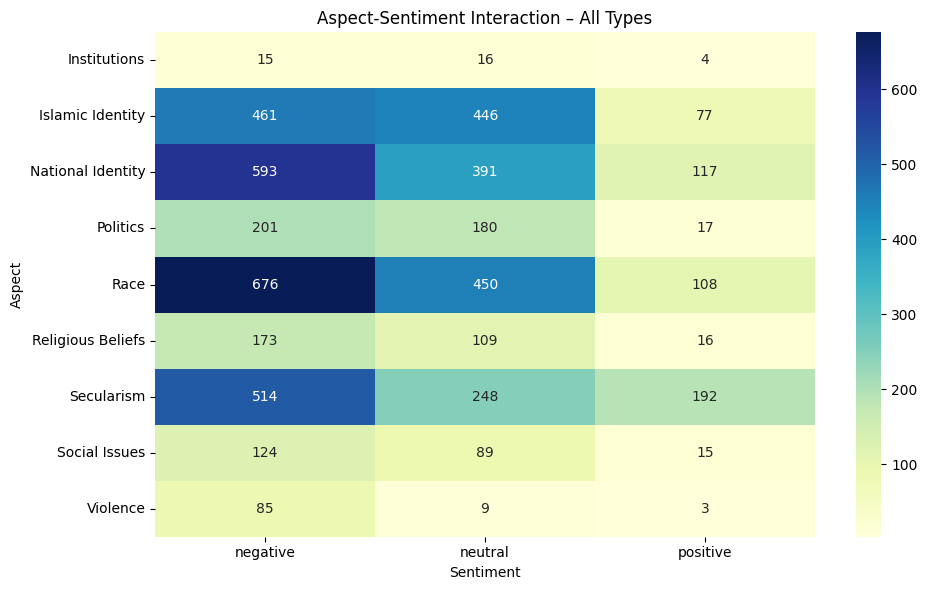

In [28]:
# Pivot the table: rows = aspect, columns = sentiment, values = count
pivot_bt = interaction_bt.pivot_table(index='aspect', columns='deberta_sentiment', values='count', aggfunc='sum', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_bt, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Aspect-Sentiment Interaction – All Types")
plt.xlabel("Sentiment")
plt.ylabel("Aspect")
plt.tight_layout()
plt.show()
